<a href="https://colab.research.google.com/github/CARLOS-DANIEL-GIL-GUZMAN/Taller-1/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
def my_ceropend(x,xhmax=0.024,xhmin=0.004):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b
  return xh

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

T1 = 6*np.pi #perido señal 1
T2 = 8*np.pi #perido señal 2
F1 = 1/T1
F2 = 1/T2
T = 24*np.pi #perido cuasiperiódica
Fs = 10*max(F1,F2) #frecuencia muestreo
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos
x = 20*(np.cos(t/3)+np.cos(t/4))
xhmax = 0.024
xhmin = 0.004
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 0 a 10
#asegurar vector columna

In [4]:
#cuantizar
nbits = 4 #número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


<ipython-input-4-1e38425e4ccf>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


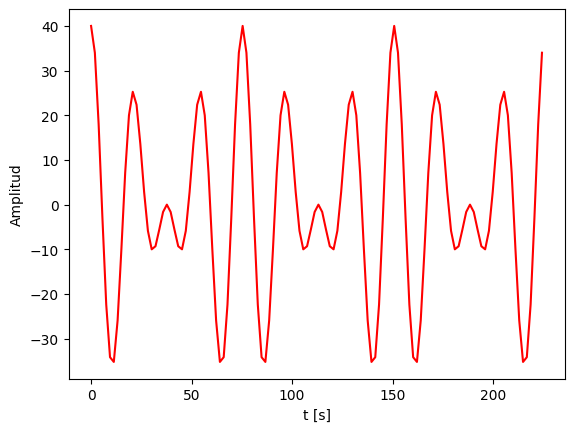

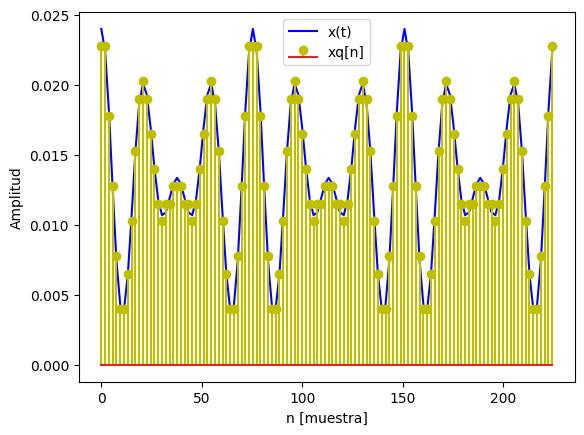

In [5]:
#gráficas de señales
plt.plot(t,x,'r',label='x(t)')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.plot(t,xh,'b',label='x(t)')
plt.stem(t,xq,'y',label='xq[n]')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()